# Data visualisation lab 2
## Made by: Paulius Lapienis
- Data set link: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
- All of the tasks were performed using the Python programming language.
### Task 1: Describing data types.
- The features used for the visualisations:
    - Time: Quantitative, Interval
    - Temperature: Qantitative, Interval
    - Humidity: Quantitative, Ratio
    - Wind: Quantitative, Ratio
    - Pressure: Quantitative, Ratio

In [7]:
from labs.definitions import DATA_DIR
import pandas as pd

DATA_PATH = DATA_DIR / "DailyDelhiClimateTrain.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["date"], index_col="date")
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


### Task 2: Statistcs (mean, min, max, etc. depending on the data types). Use box plots and other similar plots to illustrate it
The table below shows the statistics of the data set for each feature.

In [8]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Bellow are the box plots for each of the features. The box plots show the distribution of the data, the median, the interquartile range, the minimum and maximum values, and the outliers. Wind speed and pressure have the most outliers, with pressure having the highest outlier.

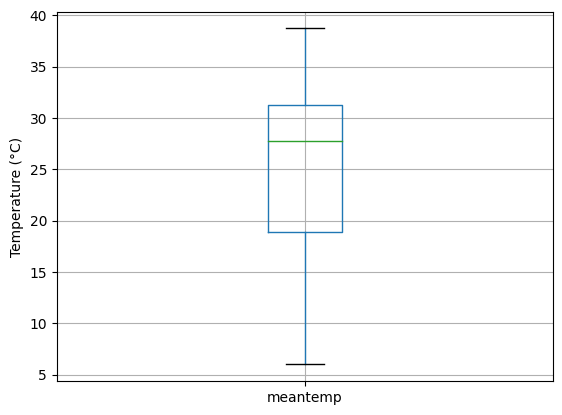

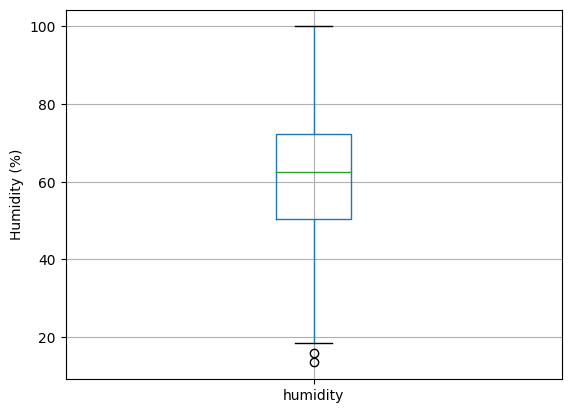

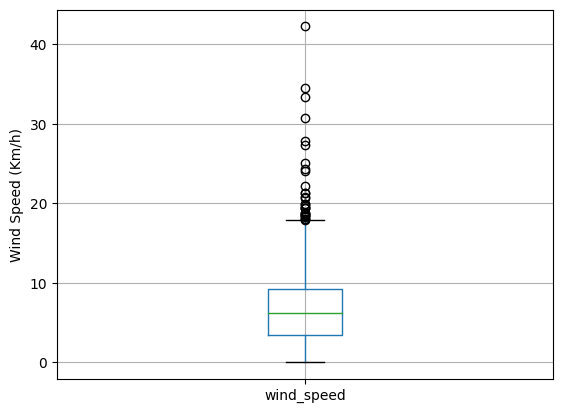

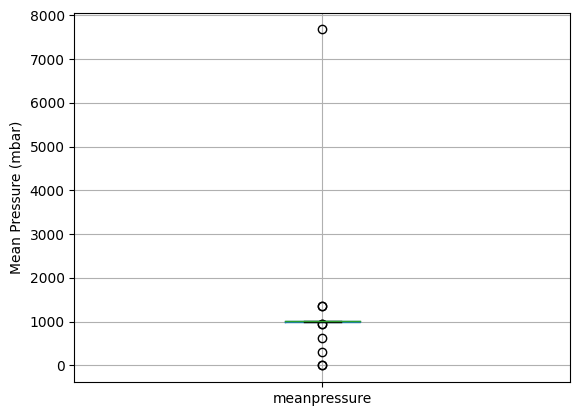

In [22]:
import matplotlib.pyplot as plt

for column in df:
    match column:
        case "meantemp":
            plt.figure()
            ax = df.boxplot([column])
            ax.set_ylabel("Temperature (°C)")
        case "humidity":
            plt.figure()
            ax = df.boxplot([column])
            ax.set_ylabel("Humidity (%)")
        case "wind_speed":
            plt.figure()
            ax = df.boxplot([column])
            ax.set_ylabel("Wind Speed (Km/h)")
        case "meanpressure":
            plt.figure()
            ax = df.boxplot([column])
            ax.set_ylabel("Mean Pressure (mbar)")

### Task 3: Create basic visualizations of your data.

Bellow is the timeseries graph for humidity. Each vertical line represents the first day of the year.

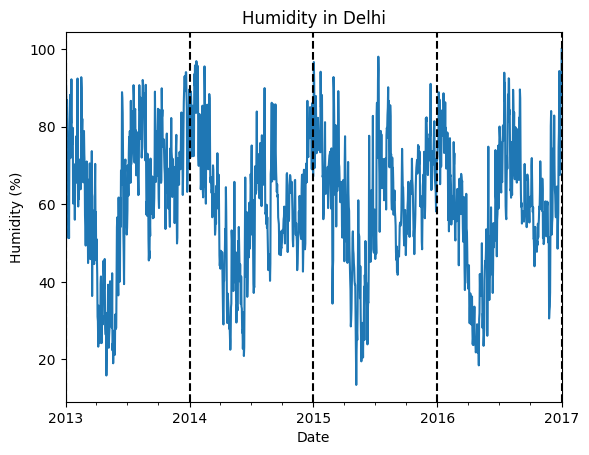

In [16]:
ax = df['humidity'].plot()
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Date")
ax.set_title("Humidity in Delhi")
xcoords = ['2013-01-01', '2014-01-01','2015-01-01', '2016-01-01', '2017-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

Bellow is the timeseries graph for Temperature. Each vertical line represents the first day of the year.

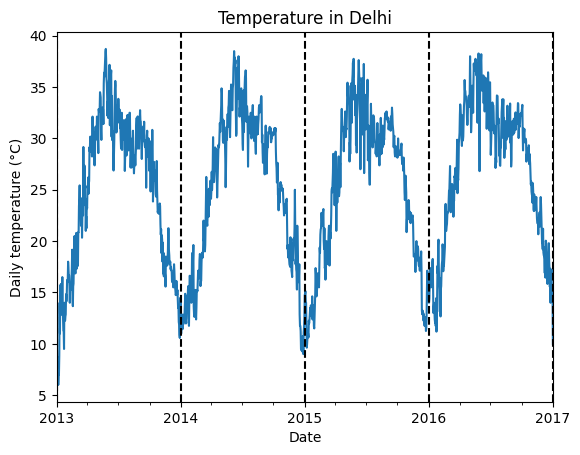

In [17]:
ax = df['meantemp'].plot()
ax.set_ylabel("Daily temperature (°C)")
ax.set_xlabel("Date")
ax.set_title("Temperature in Delhi")
xcoords = ['2013-01-01', '2014-01-01','2015-01-01', '2016-01-01', '2017-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

Bellow is the timeseries graph for Wind speed. Each vertical line represents the first day of the year.

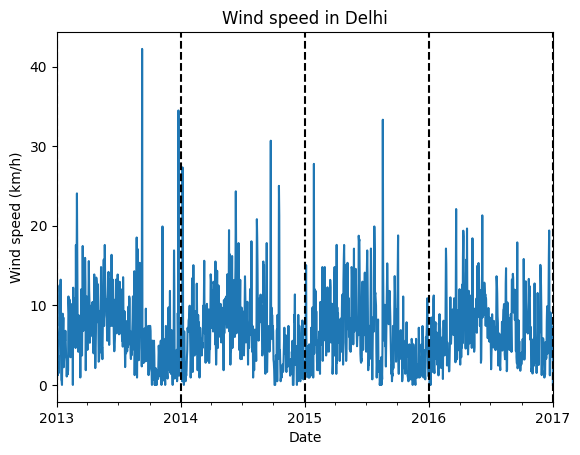

In [23]:
ax = df['wind_speed'].plot()
ax.set_ylabel("Wind speed (km/h)")
ax.set_xlabel("Date")
ax.set_title("Wind speed in Delhi")
xcoords = ['2013-01-01', '2014-01-01','2015-01-01', '2016-01-01', '2017-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

Bellow is the average wind speed per month graph. Horizontal line represents the mean wind speed.

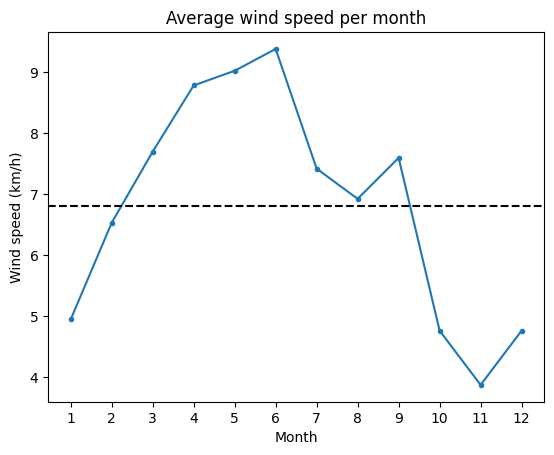

In [19]:
mean = df['wind_speed'].mean()
ax = df['wind_speed'].groupby(df.index.month).mean().plot(style=".-")
ax.set_xlabel("Month")
ax.set_ylabel("Wind speed (km/h)")
ax.set_title("Average wind speed per month")
ax.set_xticks(range(1, 13))
plt.axhline(y=mean, color='black', linestyle='--')

### Task 4: Check for periodicity in your data, show it (if there is no seasonality, show that there is no seasonality).

Text(0.5, 0.98, '')

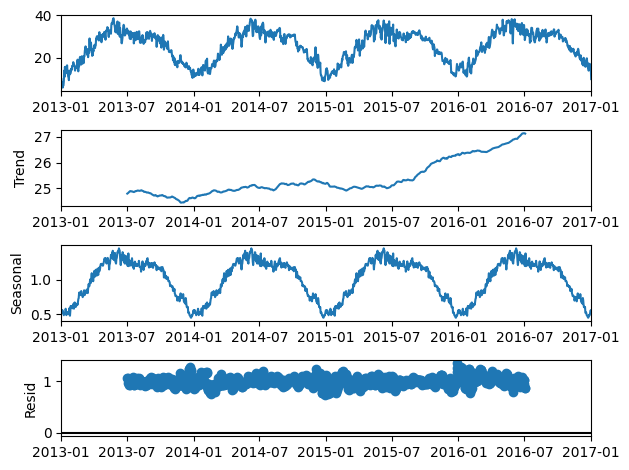

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = df[['meantemp']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=365)
decompose_result_mult.plot().suptitle("")


The period chosen for the seasonality is one year (365 days). The graphs below show the seasonality of the data. The graphs show that the data is periodic and has seasonality. It also shows a clear upwards trend